In [725]:
!pip install tqdm
!pip install torch
!pip install ipywidgets widgetsnbextension pandas-profiling

In [726]:
import pandas as pd
from datetime import datetime
import numpy as np
import json
#from tqdm.auto import tqdm
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import stats
import random
tqdm.pandas()
# Andrew NG Machine Learning Course

In [727]:
# CCU stands for concurrent users.
back=pd.read_csv("games.csv")

In [918]:
df=back
df=df.drop(axis=1, labels=["Supported languages", "Score rank", "Metacritic url", "Linux", "Mac", "Required age", "Screenshots", "Movies", "AppID", "Name", "About the game", "Notes", 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email'])

In [919]:
months=['NaN', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(1, 13):
    df['Release date']=df['Release date'].str.replace(months[i], str(i))
    df['Release date']=df['Release date'].str.replace(',', ' ')
    df['Release date']=df['Release date'].str.replace('\n', '')
    df['Release date']=' '+df['Release date']
    for j in range(0, 10):
        new=' 0'+str(j)+' '
        df['Release date']=df['Release date'].str.replace(f' {str(j)} ', new)
    df['Release date']=df['Release date'].str.replace('  ', ' ')
    df['Release date']=df['Release date'].str.strip()

In [920]:
to_drop=[]
for index, row in df.iterrows():
    if len(row['Release date'])!=10:
        to_drop.append(index)
i=len(to_drop)-1
df.drop(df.index[to_drop], inplace=True)

In [921]:
df['Release date']=pd.to_datetime(df['Release date'], format='%m %d %Y')
df['Release date']=pd.to_datetime(df['Release date'], unit='D', origin='unix')

In [922]:
df['Release date']=df['Release date']-datetime(1970,1,1)
df['Release date']=df['Release date'].dt.days

In [923]:
df['Genres']=df['Genres'].str.split(',')
df['Categories']=df['Categories'].str.split(',')
df['Tags']=df['Tags'].str.split(',')
df=df.drop('Genres', axis=1).drop('Categories', axis=1).drop('Tags', axis=1)

In [924]:
df=df.dropna()

In [925]:
df['Estimated owners']=df['Estimated owners'].str.split('-')
df['Estimated owners']=df['Estimated owners'].str[1].astype(int)

In [926]:
prices=df['Price']
df=df.drop('Price', axis=1)

In [927]:
prices=prices.to_numpy()

In [928]:
df['Pub ID'] = pd.factorize(df['Publishers'])[0]

In [929]:
df['Dev ID'] = pd.factorize(df['Developers'])[0]

In [930]:
df.drop('Publishers', axis=1, inplace=True)
df.drop('Developers', axis=1, inplace=True)

In [931]:
prices.max()

999.98

In [932]:
df['Peak CCU']/=872138
df['DLC count']/=2366
df['Metacritic score']/=97
df['User score']/=100
df['Positive']/=5764420
df['Negative']/=895978
df['Achievements']/=9821
df['Recommendations']/=3441592
df['Average playtime forever']/=145727
df['Median playtime forever']/=208473
df['Average playtime two weeks']/=10996
df['Median playtime two weeks']/=10996
df['Estimated owners']/=2000
df['Pub ID']/=43298
df['Dev ID']/=49600
df['Estimated owners']=df['Estimated owners']/100000
df['Release date']=df['Release date']/20000

In [933]:
df.head()

,Release date,Estimated owners,Peak CCU,DLC count,Windows,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Pub ID,Dev ID
0,0.70865,0.0001,0.0,0.0,True,0.0,0.0,1.040868e-06,0.000012,0.003055,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.87255,0.0001,0.0,0.0,True,0.0,0.0,9.194334e-06,0.000006,0.001222,0.0,0.0,0.0,0.0,0.0,0.000023,0.000020
2,0.94740,0.0001,0.0,0.0,True,0.0,0.0,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000046,0.000040
3,0.92330,0.0001,0.0,0.0,True,0.0,0.0,5.204340e-07,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000069,0.000060
4,0.91475,0.0001,0.0,0.0,True,0.0,0.0,8.673900e-06,0.000009,0.001731,0.0,0.0,0.0,0.0,0.0,0.000092,0.000081


In [934]:
df.drop(axis=1, labels=["Peak CCU", "Metacritic score", "User score", "Positive", "Negative", "Achievements", "Recommendations",
                       "Average playtime forever", "Average playtime two weeks", "Median playtime forever",
                       "Median playtime two weeks", "DLC count", "Windows", "Pub ID", "Dev ID", "Release date"], inplace=True)

In [935]:
df.max()

Estimated owners    1.0
dtype: float64

In [936]:
prices/=100

In [937]:
df.head(n=95)

,Estimated owners
0,0.0001
1,0.0001
2,0.0001
3,0.0001
4,0.0001
...,...
91,0.0001
93,0.0025
94,0.0001
95,0.0000


In [938]:
import torch.nn as nn
import torch

In [939]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device="cpu"

In [940]:
dfn=df.to_numpy()

In [941]:
print(dfn)
print(prices)

[[0.0001]
 [0.0001]
 [0.0001]
 ...
 [0.    ]
 [0.    ]
 [0.    ]]
[0.1999 0.0099 0.0499 ... 0.     0.0399 0.0999]


[0.074814   0.074814   0.08092513 ... 0.074814   0.07629549 0.07475228]


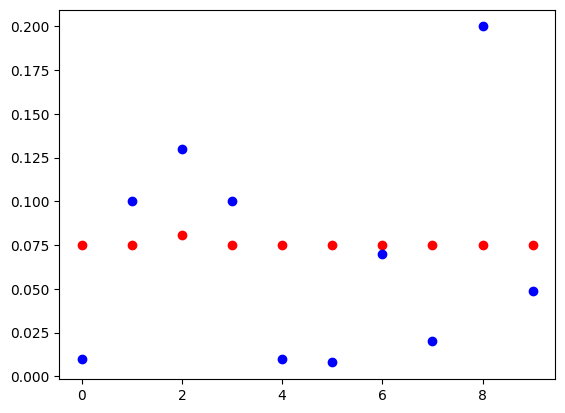

In [942]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfn, prices, test_size=0.1, shuffle=True)

from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(X_train, y_train)
#print(model.score(X_test, y_test))
#print(X_test)
y_pred=model.predict(X_test)
print(y_pred)
for i in range(0, 10):
    plt.scatter(i, y_pred[i], c='r')
    plt.scatter(i, y_test[i], c='b')
#print (y_pred, y_test)

In [943]:
from torch.utils.data import Dataset, DataLoader

class SteamDataset(Dataset):
    def __init__(self, X, y, transform=None, device="cpu"):
        self.X=X
        self.y=y
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        X=self.X[idx]
        X=np.float32(X)
        X=torch.from_numpy(X).to(device)
        y=float(self.y[idx])
        y=torch.tensor([y], dtype=torch.float32).to(device)
        return X, y

In [944]:
train_dataset=SteamDataset(X_train, y_train, device=device)
test_dataset=SteamDataset(X_test, y_test, device=device)

In [945]:
BATCH_SIZE=10

In [946]:
train_loader=DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader=DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [947]:
import torch.nn as nn
import torch
class SteamNeural(nn.Module):
    def __init__(self, n_hidden):
        super().__init__()
        self.l1=nn.Linear(1, n_hidden)
        self.l2=nn.ReLU()
        self.l3=nn.Linear(n_hidden, n_hidden)
        self.l4=nn.ReLU()
        self.l5=nn.Linear(n_hidden, 1)
    def forward(self, x):
        x=self.l2(self.l1(x))
        x=self.l5(x)
        return x

In [ ]:
model=SteamNeural(1000).to(device)
#print(model.state_dict())

In [949]:
loss_fn=nn.MSELoss()
optimizer=torch.optim.SGD(params=model.parameters(), lr=0.1)

In [950]:
n_epoch=10

In [951]:
for epoch in range(n_epoch):
    for i, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()  # Zero the gradients
        y_pred = model(X)      # Forward pass
        loss = loss_fn(y_pred, y)  # Compute loss
        loss.backward()        # Backward pass
        optimizer.step()       # Update weights
        
        if i % 10000 == 0:  # Adjust the logging frequency as needed
            print(f'Epoch {epoch+1} Index {i} Loss: {loss.item()}')

Epoch 1 Index 0 Loss: 0.00523347919806838
Epoch 2 Index 0 Loss: 0.015178329311311245
Epoch 3 Index 0 Loss: 0.0021738936193287373
Epoch 4 Index 0 Loss: 0.008471338078379631
Epoch 5 Index 0 Loss: 0.0049667940475046635
Epoch 6 Index 0 Loss: 0.03231586143374443
Epoch 7 Index 0 Loss: 0.006684072315692902
Epoch 8 Index 0 Loss: 0.0021520168520510197
Epoch 9 Index 0 Loss: 0.00697287917137146
Epoch 10 Index 0 Loss: 0.00789598561823368
Epoch 11 Index 0 Loss: 0.0051805926486849785
Epoch 12 Index 0 Loss: 0.002469209721311927
Epoch 13 Index 0 Loss: 0.00289018452167511
Epoch 14 Index 0 Loss: 0.005721195600926876


KeyboardInterrupt: 

In [952]:
torch.save(model, "model.ckpt")

In [ ]:
with torch.no_grad():
    i=0
    ind=0
    for X, y in train_loader:
        #print(y)
        y_pred=model(X)
        loss=loss_fn(y_pred, y)
        if i%1==0:
            #print (f'Index {i} Loss: {loss}')
            for q in range(1):
                j=random.randint(0, len(y_pred)-1)
                #print(j, y[j].cpu().item(), y_pred[j].cpu().item())
                plt.scatter(ind, y_pred[j].cpu().item(), c='r')
                plt.scatter(ind, y[j].cpu().item(), c='b')
                ind+=1
        i+=1
            